<a href="https://colab.research.google.com/github/faqih-fauziki/Machine_Learning/blob/main/Classification_FMD_DATASET_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification model for mask use using the InceptionNetV3 algorithm
In this case: I created 4 models with the aim of comparing tuning results based on the number of neurons in the dense layer.

Conclusion: I use model4 with a number of 1024 dense layer neurons as the best model.

## Cuda

In [ ]:
# Install this package to use Colab's GPU for training
!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package libcudnn8 is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Version '8.4.1.50-1+cuda11.6' for 'libcudnn8' was not found


## Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import zipfile
import os
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import keras
import numpy as np
#test
from sklearn.model_selection import train_test_split
import shutil
from tqdm.notebook import tqdm as tq

## Collect Dataset

In [ ]:
# Dataset = https://www.kaggle.com/datasets/shiekhburhan/face-mask-dataset
import zipfile
datapath = "/content/drive/MyDrive/\
Colab Notebooks/FACE_MASK_DATASET.zip"
zip_ref = zipfile.ZipFile(datapath, 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [ ]:
#import os
mypath = '/tmp/FACE_MASK_DATASET'
os.listdir(mypath)

['without_mask_simple',
 'incorrect_mask_mouth_chin',
 'with_mask_simple',
 'incorrect_mask_chin']

In [ ]:
#Prepared data
#Prepared data
mypath = '/tmp/FACE_MASK_DATASET'
with_mask_simple = os.path.join(
    mypath, 'with_mask_simple'
    )
without_mask_simple = os.path.join(
    mypath, 'without_mask_simple'
    )
incorrect_mask_mouth_chin =os.path.join(
    mypath, 'incorrect_mask_mouth_chin'
    )
incorrect_mask_chin = os.path.join(
    mypath, 'incorrect_mask_chin'
    )

print('total with mask simple images:',
      len(os.listdir(with_mask_simple)))
print('total without mask simple images:',
      len(os.listdir(without_mask_simple)))
print('total incorrect mask chin images:',
      len(os.listdir(incorrect_mask_chin)))
print('total incorrect mask mouth chin images:',
      len(os.listdir(incorrect_mask_mouth_chin)))

total with mask simple images: 4000
total without mask simple images: 4000
total incorrect mask chin images: 2500
total incorrect mask mouth chin images: 2500


In [ ]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name))
        tag.append(path.split('/')[-1])
        file_name.append(name)
#os.walk digunakan untuk mengakses direktori dibawah path tersebut,
#dengan output : root directory path, directory names under that path, dan file name.

In [ ]:
#import pandas as pd
df = pd.DataFrame({"path":full_path,
                   "file_name":file_name,
                   "tag":tag})
df.groupby(['tag']).size()

tag
incorrect_mask_chin          2500
incorrect_mask_mouth_chin    2500
with_mask_simple             4000
without_mask_simple          4000
dtype: int64

In [ ]:
df.head()

,path,file_name,tag
0,/tmp/FACE_MASK_DATASET/without_mask_simple/sim...,simple2180.jpg,without_mask_simple
1,/tmp/FACE_MASK_DATASET/without_mask_simple/sim...,simple2133.jpg,without_mask_simple
2,/tmp/FACE_MASK_DATASET/without_mask_simple/sim...,simple3027.jpg,without_mask_simple
3,/tmp/FACE_MASK_DATASET/without_mask_simple/sim...,simple2085.jpg,without_mask_simple
4,/tmp/FACE_MASK_DATASET/without_mask_simple/sim...,simple936.jpg,without_mask_simple


### Split Dataset

In [ ]:
x= df['path']
y= df['tag']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=300)

In [ ]:
x_test, x_val, y_test, y_val = train_test_split(
    x_test, y_test, test_size=0.5, random_state=100)

In [ ]:
# menyatukan kedalam masing-masing dataframe

df_train = pd.DataFrame({'path':x_train
              ,'tag':y_train
             ,'set':'train'})

df_test = pd.DataFrame({'path':x_test
              ,'tag':y_test
             ,'set':'test'})

df_val = pd.DataFrame({'path':x_val
              ,'tag':y_val
             ,'set':'validation'})

In [ ]:
print('train size', len(df_train))
print('val size', len(df_val))
print('test size', len(df_test))

train size 10400
val size 1300
test size 1300


In [ ]:
# # Program lama error karena terjadi perubahan pada pustaka pandas
# # melihat proporsi pada masing masing set apakah sudah ok atau masih ada yang ingin diubah
# df_all = df_train.append([df_test,df_val]).reset_index(drop=1)\

# print('===================================================== \n')
# print(df_all.groupby(['set','tag']).size(),'\n')

# print('===================================================== \n')

# #cek sample datanya
# df_all.sample(100)

In [ ]:
# Program yang sudah disesuaikan
df_all = pd.concat([df_train, df_test, df_val]).reset_index(drop=True)

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')
print('===================================================== \n')
df_all.sample(100)


set         tag                      
test        incorrect_mask_chin           255
            incorrect_mask_mouth_chin     254
            with_mask_simple              417
            without_mask_simple           374
train       incorrect_mask_chin          1968
            incorrect_mask_mouth_chin    1996
            with_mask_simple             3187
            without_mask_simple          3249
validation  incorrect_mask_chin           277
            incorrect_mask_mouth_chin     250
            with_mask_simple              396
            without_mask_simple           377
dtype: int64 




,path,tag,set
12558,/tmp/FACE_MASK_DATASET/without_mask_simple/sim...,without_mask_simple,validation
6543,/tmp/FACE_MASK_DATASET/incorrect_mask_mouth_ch...,incorrect_mask_mouth_chin,train
10684,/tmp/FACE_MASK_DATASET/incorrect_mask_chin/119...,incorrect_mask_chin,test
11093,/tmp/FACE_MASK_DATASET/with_mask_simple/simple...,with_mask_simple,test
383,/tmp/FACE_MASK_DATASET/with_mask_simple/simple...,with_mask_simple,train
...,...,...,...
9230,/tmp/FACE_MASK_DATASET/incorrect_mask_chin/909...,incorrect_mask_chin,train
4579,/tmp/FACE_MASK_DATASET/incorrect_mask_chin/104...,incorrect_mask_chin,train
266,/tmp/FACE_MASK_DATASET/with_mask_simple/simple...,with_mask_simple,train
7893,/tmp/FACE_MASK_DATASET/incorrect_mask_chin/7.jpg,incorrect_mask_chin,train


### Membuat folder hasil split

In [ ]:
datasource_path = '/tmp/FACE_MASK_DATASET/'
dataset_path = '/tmp/DATASET/'

In [ ]:
for index, row in tq(df_all.iterrows()):
    #deteksi filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
       file_path = os.path.join(datasource_path,
                               row['tag'],
                               row['image'].split('.')[0]
                               )
    #buat destinasi folder direktori
    folder_path = os.path.join(dataset_path,
                               row['set'],
                               row['tag'])
    if os.path.exists(folder_path) == False:
       os.makedirs(os.path.join(dataset_path,
                                row['set'],
                                row['tag']))
    #definisikan destinasi file
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,
                             row['set'],
                             row['tag'],
                             destination_file_name)
    #copy file ke file destinasi
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

In [ ]:
os.listdir(dataset_path)

['validation', 'train', 'test']

In [ ]:
mypath = '/tmp/FACE_MASK_DATASET'
os.listdir(dataset_path)

['validation', 'train', 'test']

##Preprocessing


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
)
validation_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/tmp/DATASET/train/',
    target_size=(150,150),
	  class_mode='categorical',
    batch_size=126,
    classes = ['incorrect_mask_chin',
           'with_mask_simple',
           'without_mask_simple',
           'incorrect_mask_mouth_chin'],
)
validation_generator = validation_datagen.flow_from_directory(
    '/tmp/DATASET/validation/',
    target_size=(150,150),
	  class_mode='categorical',
    batch_size=126,
    classes = ['incorrect_mask_chin',
           'with_mask_simple',
           'without_mask_simple',
           'incorrect_mask_mouth_chin'],
)
test_generator = test_datagen.flow_from_directory(
    '/tmp/DATASET/test/',
    target_size=(150,150),
	  class_mode='categorical',
    batch_size=126,
    classes = ['incorrect_mask_chin',
           'with_mask_simple',
           'without_mask_simple',
           'incorrect_mask_mouth_chin'],
)

Found 10400 images belonging to 4 classes.
Found 1300 images belonging to 4 classes.
Found 1300 images belonging to 4 classes.


### Visual

In [ ]:
#Visual
import matplotlib.image as mpimg

pic_index = 2

vis1 = [os.path.join(with_mask_simple, fname)
                for fname in with_mask_simple[pic_index-2:pic_index]]
vis2 = [os.path.join(without_mask_simple, fname)
                for fname in without_mask_simple[pic_index-2:pic_index]]
vis3 = [os.path.join(incorrect_mask_chin, fname)
                for fname in incorrect_mask_chin[pic_index-2:pic_index]]
vis4 = [os.path.join(incorrect_mask_mouth_chin, fname)
                for fname in incorrect_mask_mouth_chin[pic_index-2:pic_index]]

# for i, img_path in enumerate(vis1+vis2+vis3+vis4):
#   img = mpimg.imread(img_path)
#   plt.imshow(img)
#   plt.axis('Off')
#   plt.show()

# Menggabungkan semua list
image_paths = vis1 + vis2 + vis3 + vis4

# Filter hanya file yang valid
valid_image_paths = [img_path for img_path in image_paths if os.path.isfile(img_path)]

for i, img_path in enumerate(valid_image_paths):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

###Visual after Augmentation

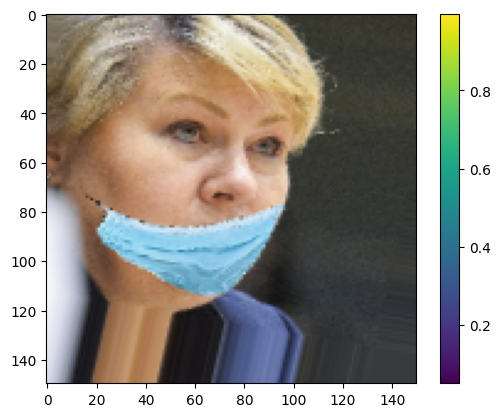

[0. 0. 0. 1.]


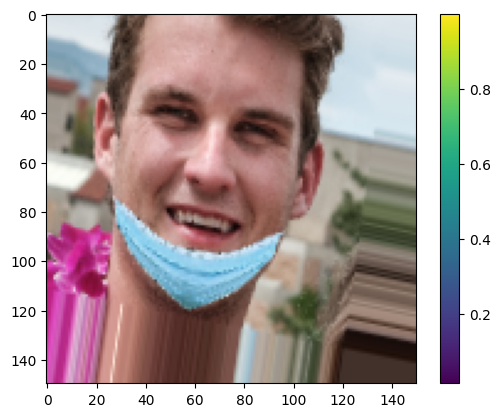

[1. 0. 0. 0.]


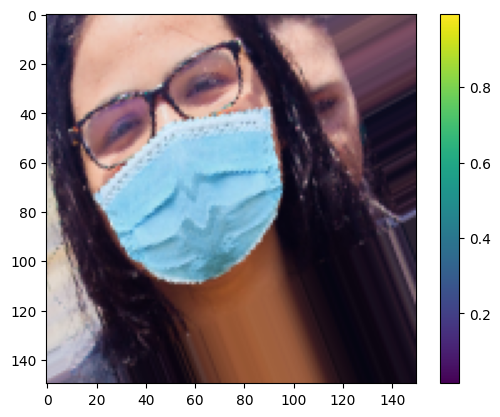

[0. 1. 0. 0.]


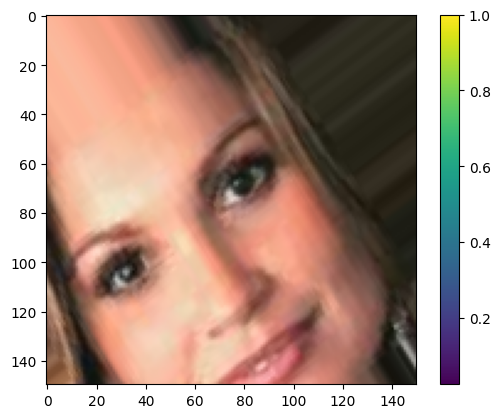

[0. 0. 1. 0.]


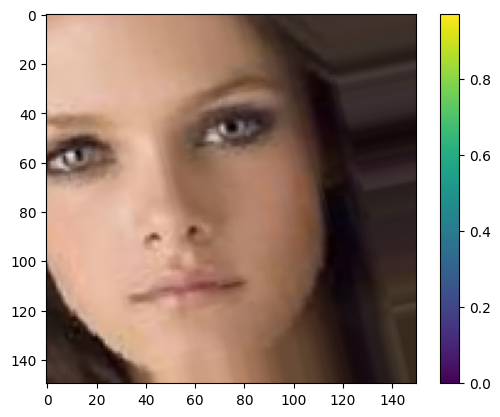

[0. 0. 1. 0.]


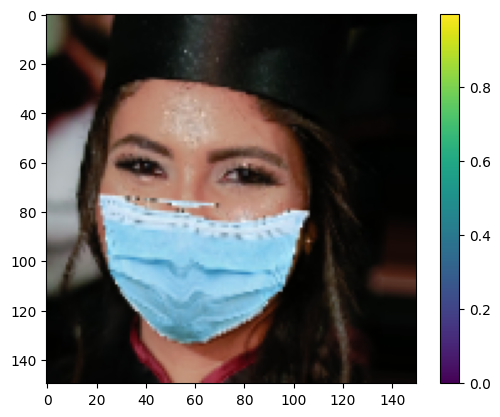

[0. 1. 0. 0.]


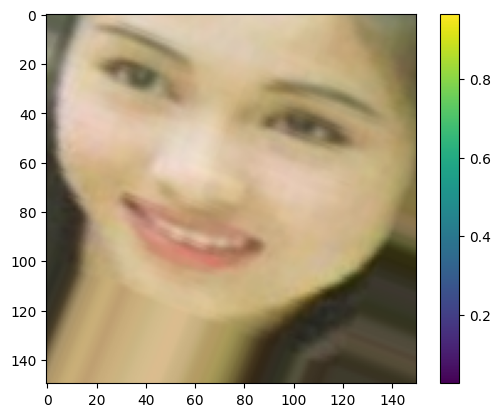

[0. 0. 1. 0.]


In [ ]:
for my_batch in train_generator:
  image = my_batch[0]
  labels = my_batch[1]
  for i in range(0,7):
    plt.imshow(image[i])
    plt.colorbar()
    plt.show()
    print(labels[i])
  break
#https://www.youtube.com/watch?v=9_OFSSYcVWU

###Contoh Visual


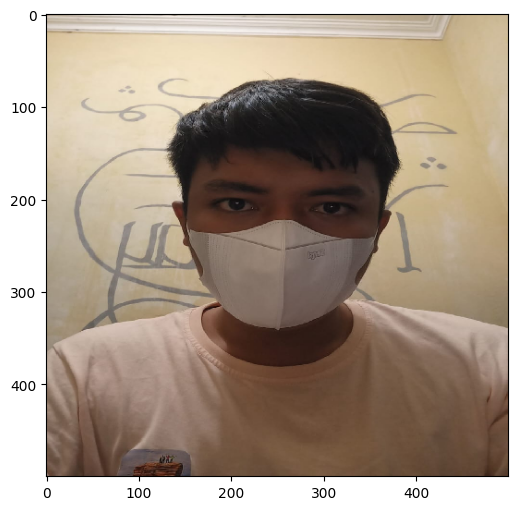

In [ ]:
#Loads image in from the set image path
path = "/content/drive/MyDrive/Colab Notebooks/Faqih_With_Mask.jpeg"
img = tf.keras.utils.load_img(path, target_size= (500,500))
img_tensor = tf.keras.utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#Allows us to properly visualize our image by rescaling values in array
img_tensor /= 255.
#Plots image
plt.figure(figsize=(6,6))
plt.imshow(img_tensor[0])
plt.show()

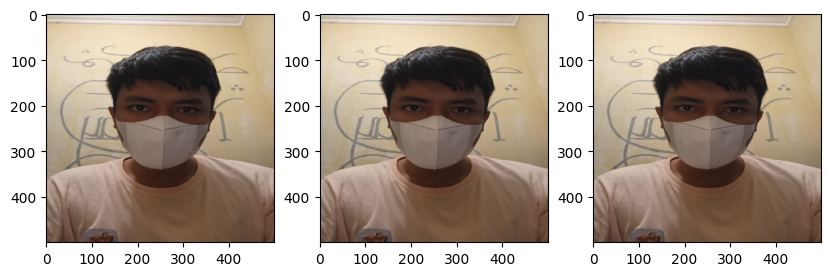

In [ ]:
#Loads in image path
img = tf.keras.utils.load_img("/content/drive/MyDrive/Colab Notebooks/Faqih_With_Mask.jpeg", target_size= (500,500))
img_tensor = tf.keras.utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(
      #rescale = 1./255.,
      #rotation_range=40,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      #shear_range=0.2,
      #zoom_range=0.2,
      horizontal_flip=True,
      )
#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(10,8))
#Plots our figures
for i in range(1,4):
  plt.subplot(1, 3, i)
  batch = pic.next()
  image_ = batch[0].astype('uint8')
  plt.imshow(image_)
plt.show()

In [ ]:
pic

##Modeling

In [ ]:
import tensorflow as tf
import urllib.request
from tensorflow.keras.applications.inception_v3 import InceptionV3

inceptionv3 = 'https://storage.googleapis.com/mledu-datasets/\
inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
urllib.request.urlretrieve(
    inceptionv3,
    'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')
local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None, )
pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False

In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalizati

In [ ]:
# last_layer = pre_trained_model.get_layer('mixed7')

# x = tf.keras.layers.Flatten()(last_layer.output)
# x = tf.keras.layers.Dense(1024, activation='relu')(x)
# x = tf.keras.layers.Dropout(0.2)(x)
# x = tf.keras.layers.Dense(4, activation='softmax')(x)

# model = tf.keras.Model(pre_trained_model.input, x)

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')

x1 = tf.keras.layers.Flatten()(last_layer.output)
x1 = tf.keras.layers.Dense(256, activation='relu')(x1)
x1 = tf.keras.layers.Dropout(0.2)(x1)
x1 = tf.keras.layers.Dense(4, activation='softmax')(x1)

model1 = tf.keras.Model(pre_trained_model.input, x1)

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')

x2 = tf.keras.layers.Flatten()(last_layer.output)
x2 = tf.keras.layers.Dense(512, activation='relu')(x2)
x2 = tf.keras.layers.Dropout(0.2)(x2)
x2 = tf.keras.layers.Dense(4, activation='softmax')(x2)

model2 = tf.keras.Model(pre_trained_model.input, x2)

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')

x3 = tf.keras.layers.Flatten()(last_layer.output)
x3 = tf.keras.layers.Dense(1024, activation='relu')(x3)
x3 = tf.keras.layers.Dropout(0.2)(x3)
x3 = tf.keras.layers.Dense(4, activation='softmax')(x3)

model3 = tf.keras.Model(pre_trained_model.input, x3)

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')

x4 = tf.keras.layers.Flatten()(last_layer.output)
x4 = tf.keras.layers.Dense(1024, activation='relu')(x4)
x4 = tf.keras.layers.Dense(4, activation='softmax')(x4)

model4 = tf.keras.Model(pre_trained_model.input, x4)

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')

x5 = tf.keras.layers.Flatten()(last_layer.output)
x5 = tf.keras.layers.Dense(1024, activation='relu')(x5)
x5 = tf.keras.layers.Dropout(0.5)(x5)
x5 = tf.keras.layers.Dense(4, activation='softmax')(x5)

model5 = tf.keras.Model(pre_trained_model.input, x3)

In [ ]:
model4.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalization[0]

In [ ]:
for layer in model4.layers:
    print(layer.name)

input_1
conv2d
batch_normalization
activation
conv2d_1
batch_normalization_1
activation_1
conv2d_2
batch_normalization_2
activation_2
max_pooling2d
conv2d_3
batch_normalization_3
activation_3
conv2d_4
batch_normalization_4
activation_4
max_pooling2d_1
conv2d_8
batch_normalization_8
activation_8
conv2d_6
conv2d_9
batch_normalization_6
batch_normalization_9
activation_6
activation_9
average_pooling2d
conv2d_5
conv2d_7
conv2d_10
conv2d_11
batch_normalization_5
batch_normalization_7
batch_normalization_10
batch_normalization_11
activation_5
activation_7
activation_10
activation_11
mixed0
conv2d_15
batch_normalization_15
activation_15
conv2d_13
conv2d_16
batch_normalization_13
batch_normalization_16
activation_13
activation_16
average_pooling2d_1
conv2d_12
conv2d_14
conv2d_17
conv2d_18
batch_normalization_12
batch_normalization_14
batch_normalization_17
batch_normalization_18
activation_12
activation_14
activation_17
activation_18
mixed1
conv2d_22
batch_normalization_22
activation_22
conv2d

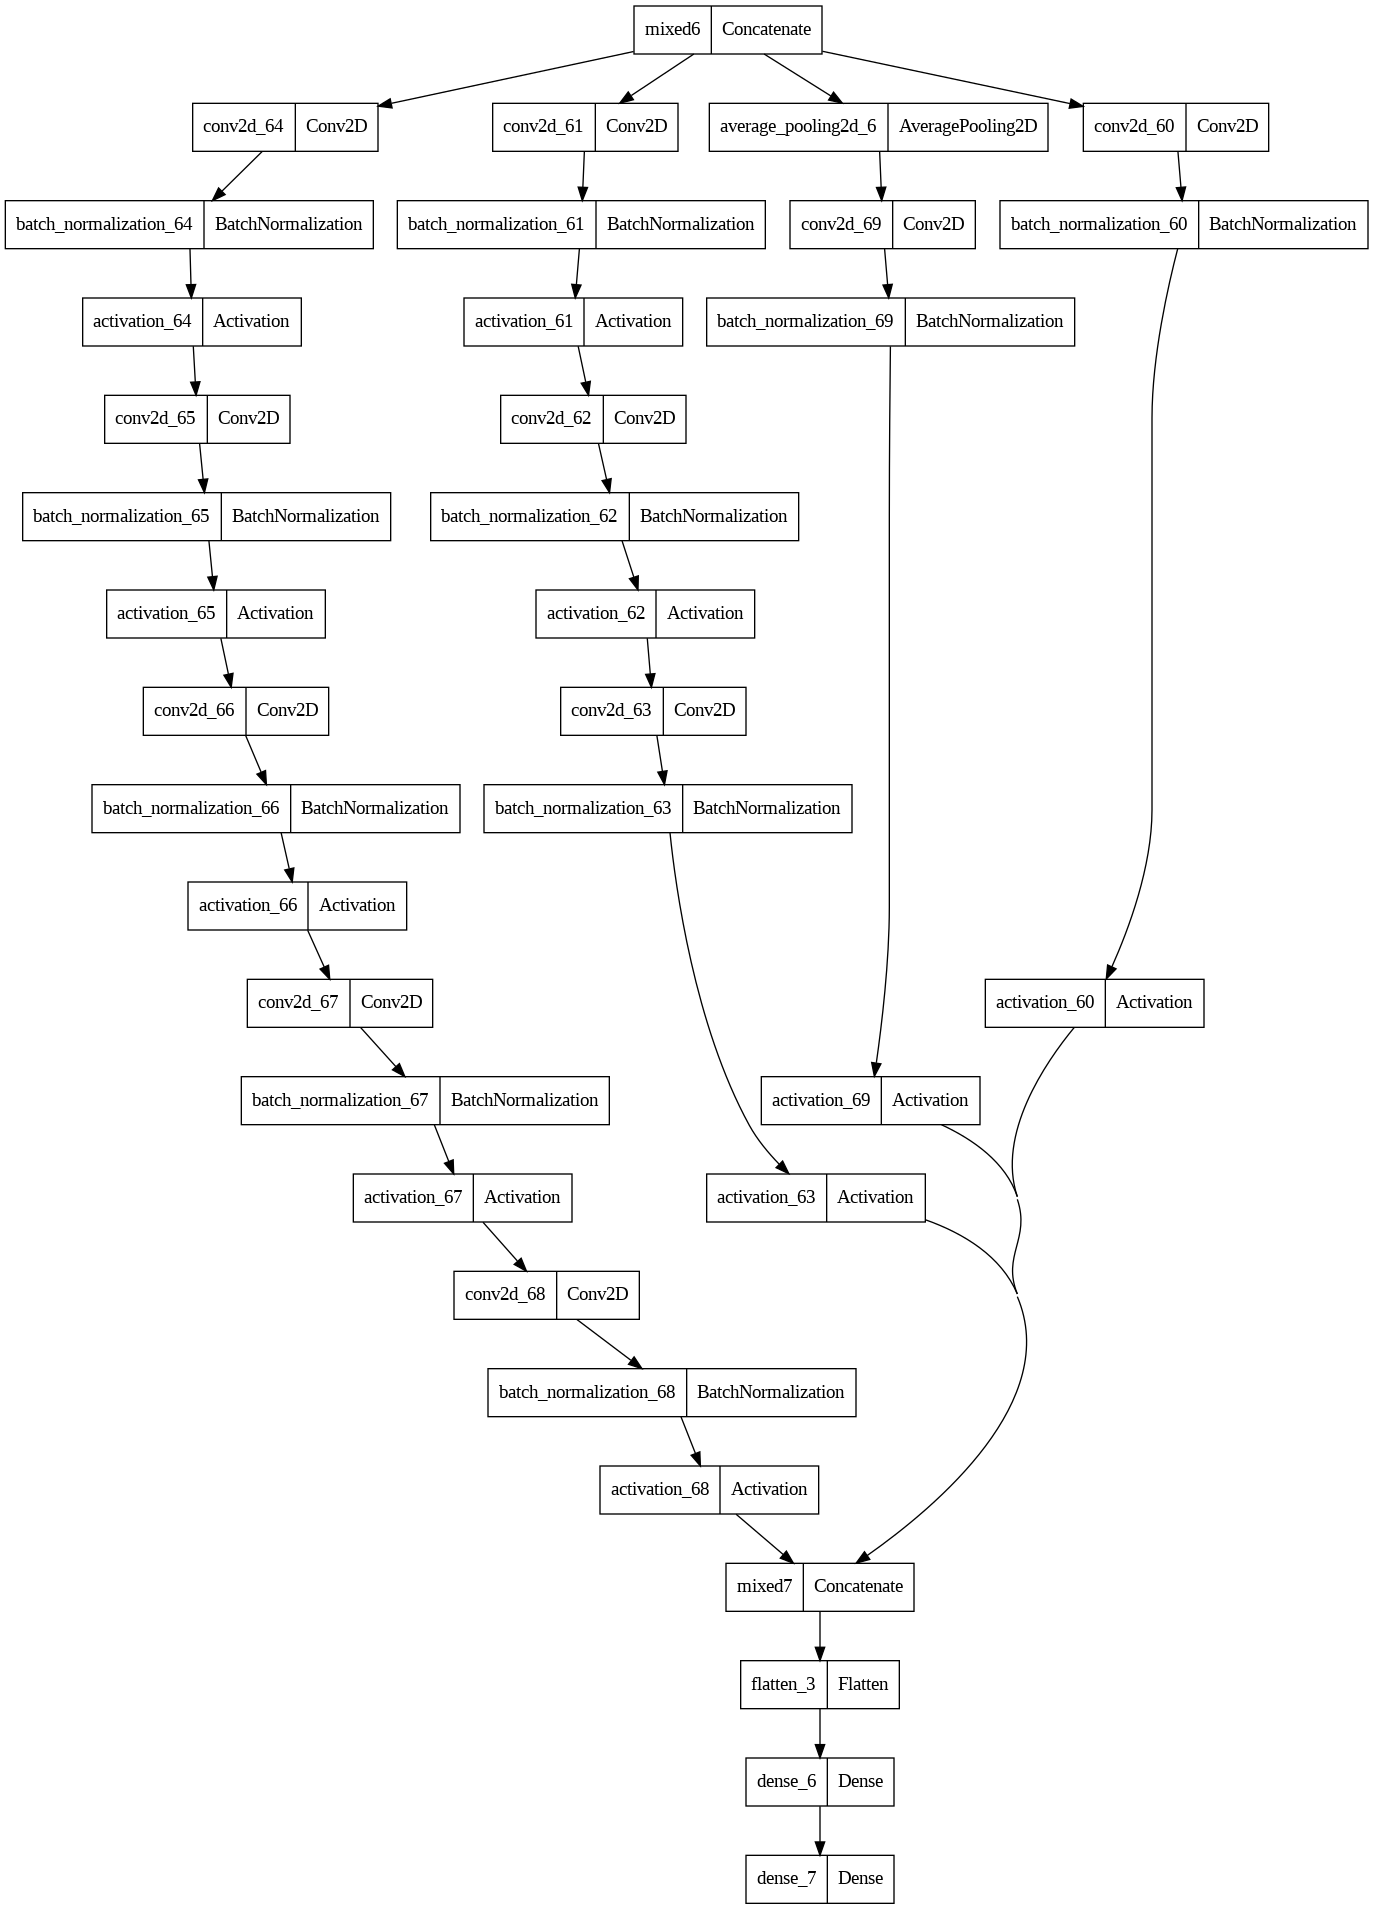

In [ ]:
#Model Viz
from tensorflow.keras.utils import plot_model
model_viz = tf.keras.utils.plot_model(
    model4,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=['mixed6','dense_7'],
    show_layer_activations=False

)
model_viz

##Training

In [ ]:
# Make callbacks to save the best model and weight only
def model_checkpoint(directory, name):
  file_path = directory + "/" + name
  checkpoint_dir = os.path.dirname(file_path)
  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
  filepath=file_path,
  save_weights_only=True,
  monitor='val_accuracy',
  verbose = 1,
  save_best_only=True
)
  return model_checkpoint_callback

In [ ]:
model1.compile(loss = 'categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model2.compile(loss = 'categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model3.compile(loss = 'categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model4.compile(loss = 'categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model4.compile(loss = 'categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
hist_model1 = model1.fit(
    train_generator,
    epochs = 10,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=int(0.1 * len(validation_generator)),
    callbacks=[model_checkpoint("save_model","model.ckpt")],
                       )

Epoch 1/10
83/83 [==============================] - ETA: 0s - loss: 0.9942 - accuracy: 0.7917
Epoch 1: val_accuracy improved from -inf to 0.96825, saving model to save_model/model.ckpt
83/83 [==============================] - 649s 8s/step - loss: 0.9942 - accuracy: 0.7917 - val_loss: 0.1559 - val_accuracy: 0.9683
Epoch 2/10
83/83 [==============================] - ETA: 0s - loss: 0.2845 - accuracy: 0.8988
Epoch 2: val_accuracy did not improve from 0.96825
83/83 [==============================] - 604s 7s/step - loss: 0.2845 - accuracy: 0.8988 - val_loss: 0.1130 - val_accuracy: 0.9365
Epoch 3/10
83/83 [==============================] - ETA: 0s - loss: 0.2114 - accuracy: 0.9206
Epoch 3: val_accuracy improved from 0.96825 to 0.98413, saving model to save_model/model.ckpt
83/83 [==============================] - 598s 7s/step - loss: 0.2114 - accuracy: 0.9206 - val_loss: 0.0331 - val_accuracy: 0.9841
Epoch 4/10
83/83 [==============================] - ETA: 0s - loss: 0.1836 - accuracy: 0.931

In [ ]:
hist_model2 = model2.fit(
    train_generator,
    epochs = 10,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=int(0.1 * len(validation_generator)),
    callbacks=[model_checkpoint("save_model","model.ckpt")],
                       )

Epoch 1/10
83/83 [==============================] - ETA: 0s - loss: 1.5129 - accuracy: 0.7831
Epoch 1: val_accuracy improved from -inf to 0.97619, saving model to save_model/model.ckpt
83/83 [==============================] - 620s 7s/step - loss: 1.5129 - accuracy: 0.7831 - val_loss: 0.1017 - val_accuracy: 0.9762
Epoch 2/10
83/83 [==============================] - ETA: 0s - loss: 0.2844 - accuracy: 0.8937
Epoch 2: val_accuracy did not improve from 0.97619
83/83 [==============================] - 619s 7s/step - loss: 0.2844 - accuracy: 0.8937 - val_loss: 0.2006 - val_accuracy: 0.9286
Epoch 3/10
83/83 [==============================] - ETA: 0s - loss: 0.2274 - accuracy: 0.9169
Epoch 3: val_accuracy improved from 0.97619 to 0.98413, saving model to save_model/model.ckpt
83/83 [==============================] - 615s 7s/step - loss: 0.2274 - accuracy: 0.9169 - val_loss: 0.0376 - val_accuracy: 0.9841
Epoch 4/10
83/83 [==============================] - ETA: 0s - loss: 0.1758 - accuracy: 0.936

In [ ]:
hist_model3 = model3.fit(
    train_generator,
    epochs = 10,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=int(0.1 * len(validation_generator)),
    callbacks=[model_checkpoint("save_model","model.ckpt")],
                       )

Epoch 1/10
83/83 [==============================] - ETA: 0s - loss: 1.9394 - accuracy: 0.7803
Epoch 1: val_accuracy improved from -inf to 0.88889, saving model to save_model/model.ckpt
83/83 [==============================] - 648s 8s/step - loss: 1.9394 - accuracy: 0.7803 - val_loss: 0.2405 - val_accuracy: 0.8889
Epoch 2/10
83/83 [==============================] - ETA: 0s - loss: 0.2908 - accuracy: 0.8929
Epoch 2: val_accuracy improved from 0.88889 to 0.97619, saving model to save_model/model.ckpt
83/83 [==============================] - 659s 8s/step - loss: 0.2908 - accuracy: 0.8929 - val_loss: 0.0638 - val_accuracy: 0.9762
Epoch 3/10
83/83 [==============================] - ETA: 0s - loss: 0.2123 - accuracy: 0.9232
Epoch 3: val_accuracy improved from 0.97619 to 0.98413, saving model to save_model/model.ckpt
83/83 [==============================] - 648s 8s/step - loss: 0.2123 - accuracy: 0.9232 - val_loss: 0.0557 - val_accuracy: 0.9841
Epoch 4/10
83/83 [==============================]

In [ ]:
hist_model4 = model4.fit(
    train_generator,
    epochs = 10,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=int(0.1 * len(validation_generator)),
    callbacks=[model_checkpoint("save_model","model.ckpt")],
                       )

Epoch 1/10
11/83 [==>...........................] - ETA: 10:50 - loss: 14.5012 - accuracy: 0.5181

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


83/83 [==============================] - ETA: 0s - loss: 2.3091 - accuracy: 0.7786
Epoch 1: val_accuracy improved from -inf to 0.93651, saving model to save_model/model.ckpt
83/83 [==============================] - 720s 9s/step - loss: 2.3091 - accuracy: 0.7786 - val_loss: 0.1277 - val_accuracy: 0.9365
Epoch 2/10
83/83 [==============================] - ETA: 0s - loss: 0.2763 - accuracy: 0.8986
Epoch 2: val_accuracy improved from 0.93651 to 0.95238, saving model to save_model/model.ckpt
83/83 [==============================] - 725s 9s/step - loss: 0.2763 - accuracy: 0.8986 - val_loss: 0.1402 - val_accuracy: 0.9524
Epoch 3/10
83/83 [==============================] - ETA: 0s - loss: 0.1978 - accuracy: 0.9257
Epoch 3: val_accuracy improved from 0.95238 to 0.96825, saving model to save_model/model.ckpt
83/83 [==============================] - 718s 9s/step - loss: 0.1978 - accuracy: 0.9257 - val_loss: 0.1321 - val_accuracy: 0.9683
Epoch 4/10
83/83 [==============================] - ETA: 0s 

In [ ]:
# hist_model5 = model5.fit(
#     train_generator,
#     epochs = 10,
#     steps_per_epoch=len(train_generator),
#     validation_data=validation_generator,
#     validation_steps=int(0.1 * len(validation_generator)),
#     callbacks=[model_checkpoint("save_model","model.ckpt")],
#                        )

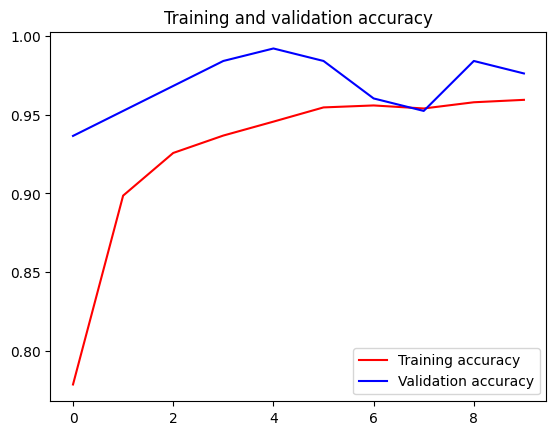

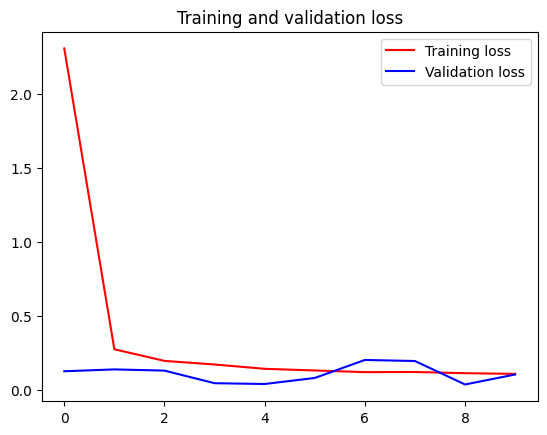

<Figure size 640x480 with 0 Axes>

In [ ]:
hist_model = hist_model4
acc = hist_model.history['accuracy']
val_acc = hist_model.history['val_accuracy']
loss = hist_model.history['loss']
val_loss = hist_model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

##Testing

In [ ]:
print(f'\nMODEL EVALUATION:')
test = model4.evaluate(test_generator)


MODEL EVALUATION:
11/11 [==============================] - 69s 6s/step - loss: 0.1043 - accuracy: 0.9708


In [ ]:
# Re-evaluate the model
loss, acc = model4.evaluate(
    test_generator,
    verbose=2
    )
print("accuracy: {:5.2f}%\nloss: {:5.2f}%".format(100*acc,100*loss))

11/11 - 71s - loss: 0.1043 - accuracy: 0.9708 - 71s/epoch - 6s/step
accuracy: 97.08%
loss: 10.43%


##Prediction

In [ ]:
print(x_test.head())

10550    /tmp/FACE_MASK_DATASET/incorrect_mask_chin/146...
3106     /tmp/FACE_MASK_DATASET/without_mask_simple/sim...
1763     /tmp/FACE_MASK_DATASET/without_mask_simple/sim...
7231     /tmp/FACE_MASK_DATASET/with_mask_simple/simple...
5461     /tmp/FACE_MASK_DATASET/incorrect_mask_mouth_ch...
Name: path, dtype: object


In [ ]:
test_with_mask_fnames = os.listdir('/tmp/DATASET/test/with_mask_simple')
test_without_mask_fnames = os.listdir('/tmp/DATASET/test/without_mask_simple')
test_incorrect_mask_mouth_chin_fnames = os.listdir('/tmp/DATASET/test/incorrect_mask_mouth_chin')
test_incorrect_mask_chin_fnames = os.listdir('/tmp/DATASET/test/incorrect_mask_chin')

testdir=os.listdir('/tmp/DATASET/test/')

pred_0=(test_incorrect_mask_chin_fnames[:2])
pred_1=(test_with_mask_fnames[:2])
pred_2=(test_without_mask_fnames[:2])
pred_3=(test_incorrect_mask_mouth_chin_fnames[:2])


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

for fn in pred_0:
  print(fn)
  # predicting images
  path= '/tmp/DATASET/test/incorrect_mask_chin/'+fn
  img=load_img(path, target_size=(150, 150))
  print(path)
  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model4.predict(images, batch_size=10)

  print(classes[0])

  if classes[0][0]>0.25:
    print(fn + " is incorrect_mask_chin")
  elif classes[0][1]>0.25:
    print(fn + " is with_mask_simple")
  elif classes[0][2]>0.25:
    print(fn + " is without_mask_simple")
  elif classes[0][3]>0.25:
    print(fn + " is incorrect_mask_mouth_chin")
  else:
    print(fn + "?")

1382.jpg
/tmp/DATASET/test/incorrect_mask_chin/1382.jpg
1/1 [==============================] - 2s 2s/step
[9.9994922e-01 6.3186362e-10 4.9143728e-05 1.6914105e-06]
1382.jpg is incorrect_mask_chin
1168.jpg
/tmp/DATASET/test/incorrect_mask_chin/1168.jpg
1/1 [==============================] - 0s 84ms/step
[1.0000000e+00 5.0151987e-14 2.6417220e-09 3.7824776e-08]
1168.jpg is incorrect_mask_chin


Saving DJ-Snake1.jpg to DJ-Snake1 (1).jpg
DJ-Snake1 (1).jpg
1/1 [==============================] - 0s 90ms/step
[7.4274922e-06 9.1739465e-05 9.9990034e-01 5.0120678e-07]


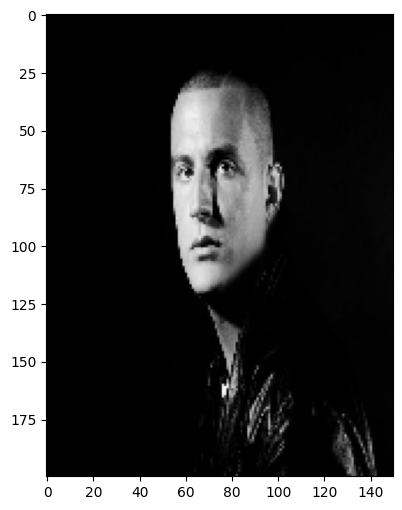

DJ-Snake1 (1).jpg is without_mask_simple


In [ ]:
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded:
  # predicting images
  path= fn
  img=load_img(path, target_size=(150, 150))
  print(path)
  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model4.predict(images, batch_size=10)
  print(classes[0])

  #Loads image in from the set image path
  img = tf.keras.utils.load_img(fn, target_size= (200,150))
  img_tensor = tf.keras.utils.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  #Allows us to properly visualize our image by rescaling values in array
  img_tensor /= 255.
  #Plots image
  plt.figure(figsize=(6,6))
  plt.imshow(img_tensor[0])
  plt.show()

  if classes[0][0]>0.25:
    print(fn + " is incorrect_mask_chin")
  elif classes[0][1]>0.25:
    print(fn + " is with_mask_simple")
  elif classes[0][2]>0.25:
    print(fn + " is without_mask_simple")
  elif classes[0][3]>0.25:
    print(fn + " is incorrect_mask_mouth_chin")
  else:
    print(fn + "?")

##Evaluate

Text(0.5, 1.0, 'Training and validation loss')

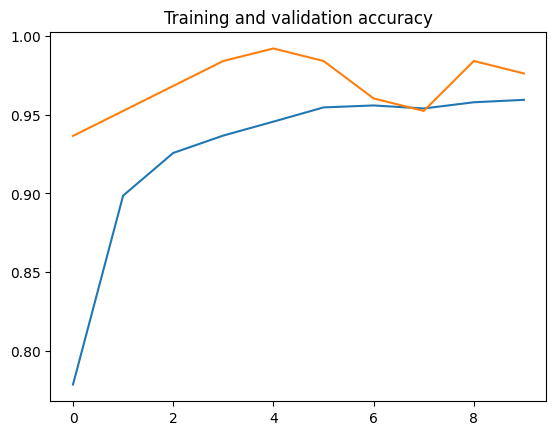

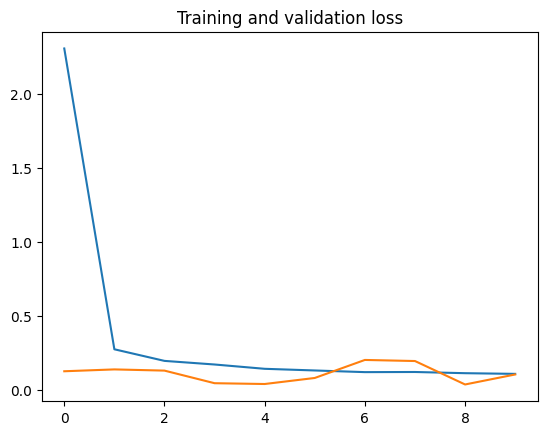

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = hist_model.history['accuracy' ]
val_acc  = hist_model.history[ 'val_accuracy' ]
loss     = hist_model.history['loss' ]
val_loss = hist_model.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs, acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [ ]:
model4.save("model.h5")
print("Saved model to disk")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved model to disk
